___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [58]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [59]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


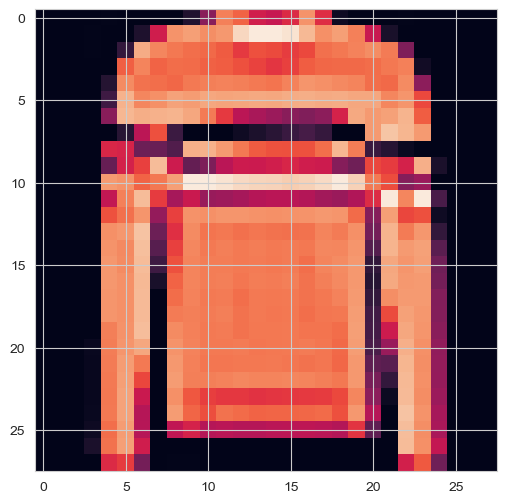

In [60]:
plt.imshow(X_train[5])
plt.show()

In [61]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [62]:
y_train[5]

2

In [63]:
X_train.shape

(60000, 28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [64]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

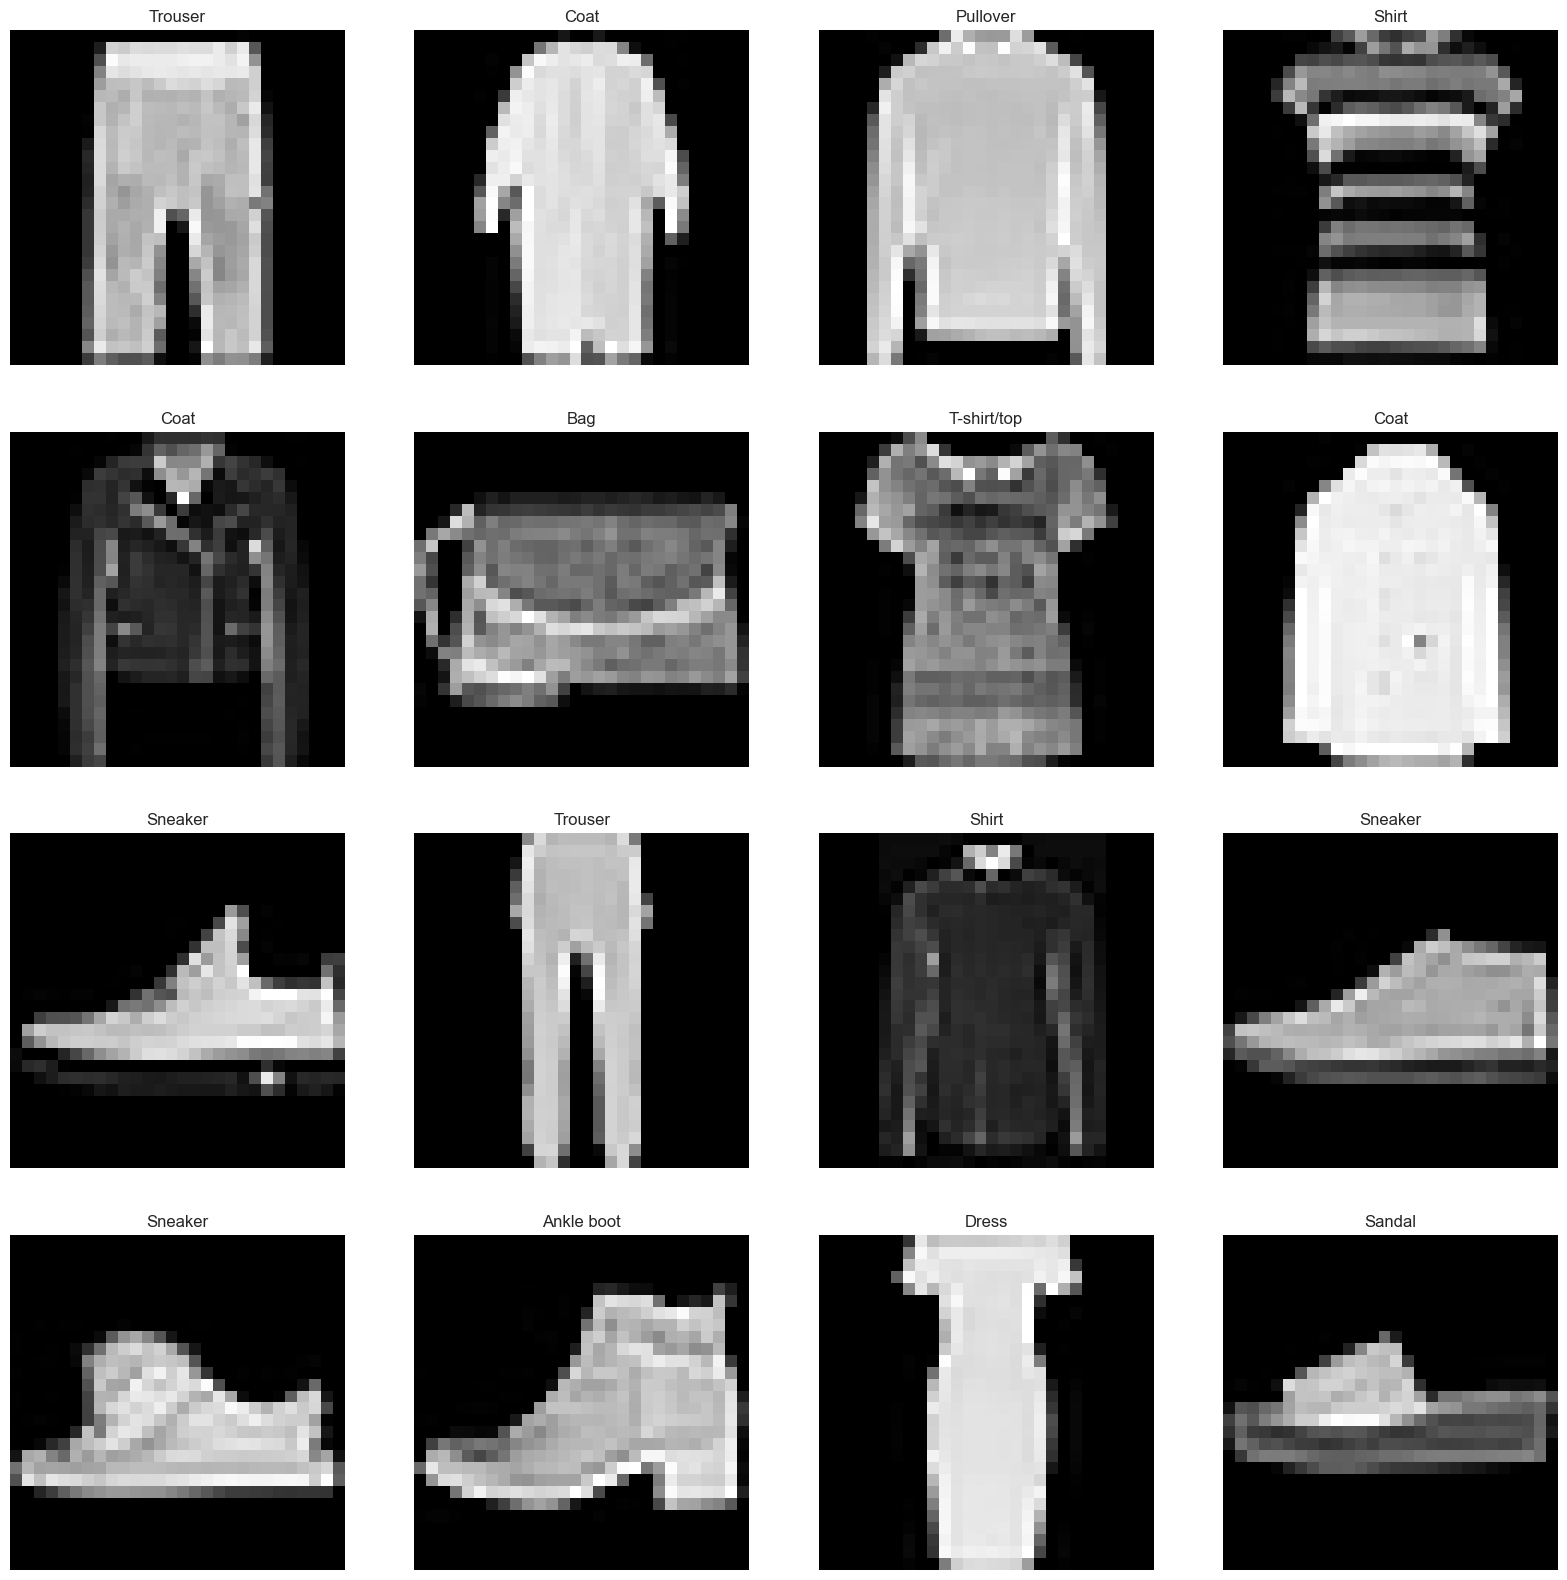

In [65]:
import matplotlib.pyplot as plt

# Define a custom colormap for changing colors (e.g., 'hot', 'cool', 'viridis', etc.)
custom_cmap = 'gray'  # I can change this to any colormap

plt.figure(figsize=(20, 20))
for i in range(16):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index], cmap=custom_cmap)  # Use the custom colormap

plt.show()


In [66]:
i = 0  # Initialize the index

for class_name in classes:
    print(f"{i} {class_name}") # Perform an operation on each class
    i += 1  # Increment the index
    

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [67]:
X_train[3].min()

0

In [68]:
X_train[3].max()

255

In [69]:
X_train = X_train.astype("float")
X_test = X_test.astype("float")

X_train = X_train / 255
X_test = X_test / 255

In [70]:
X_train[3].min()

0.0

In [71]:
X_train[3].max()

1.0

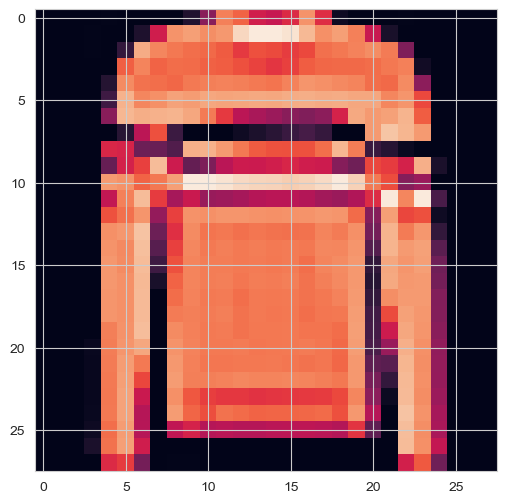

In [72]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [73]:
X_train.shape

(60000, 28, 28)

In [74]:
X_test.shape

(10000, 28, 28)

In [75]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [76]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [77]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [79]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor="val_accuracy", 
                           mode="max", 
                           patience=2,
                           restore_best_weights=True)

In [83]:
model.fit(X_train, y_train, 
          batch_size=64, 
          epochs=10, 
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/10
938/938 [==============================] - 30s 32ms/step - loss: 0.4174 - accuracy: 0.8536 - val_loss: 0.3270 - val_accuracy: 0.8828
Epoch 2/10
938/938 [==============================] - 33s 36ms/step - loss: 0.2693 - accuracy: 0.9025 - val_loss: 0.3496 - val_accuracy: 0.8729
Epoch 3/10
938/938 [==============================] - 34s 36ms/step - loss: 0.2250 - accuracy: 0.9176 - val_loss: 0.2637 - val_accuracy: 0.9043
Epoch 4/10
938/938 [==============================] - 33s 35ms/step - loss: 0.1942 - accuracy: 0.9277 - val_loss: 0.2563 - val_accuracy: 0.9080
Epoch 5/10
938/938 [==============================] - 35s 37ms/step - loss: 0.1699 - accuracy: 0.9372 - val_loss: 0.2509 - val_accuracy: 0.9118
Epoch 6/10
938/938 [==============================] - 37s 40ms/step - loss: 0.1483 - accuracy: 0.9457 - val_loss: 0.2815 - val_accuracy: 0.9053
Epoch 7/10
938/938 [==============================] - 36s 39ms/step - loss: 0.1290 - accuracy: 0.9520 - val_loss: 0.2702 - val_accuracy:

**TASK 7: Plot values of metrics you used in your model.**

In [84]:
summary = pd.DataFrame(model.history.history)
summary
#This suggests that the model is learning from the data and generalizing well
# the model is not overfitting the training data.

,loss,accuracy,val_loss,val_accuracy
0,0.417,0.854,0.327,0.883
1,0.269,0.902,0.350,0.873
2,0.225,0.918,0.264,0.904
3,0.194,0.928,0.256,0.908
4,0.170,0.937,0.251,0.912
5,0.148,0.946,0.281,0.905
6,0.129,0.952,0.270,0.911


<Axes: >

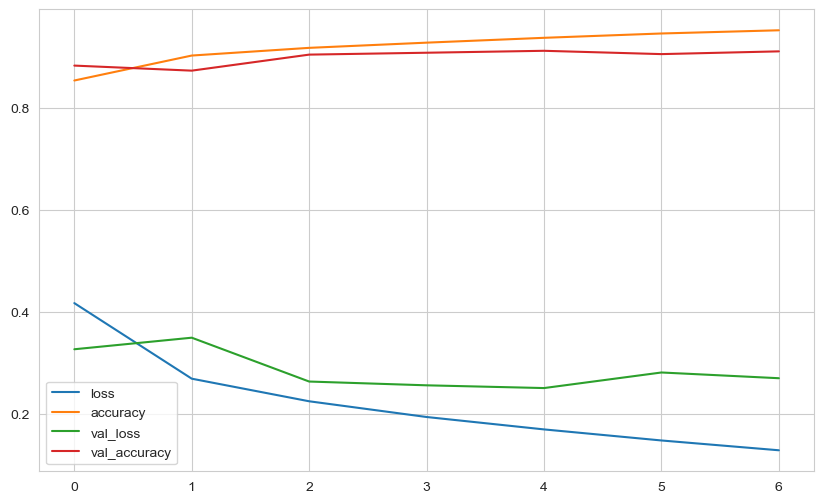

In [85]:
summary.plot()

<Axes: >

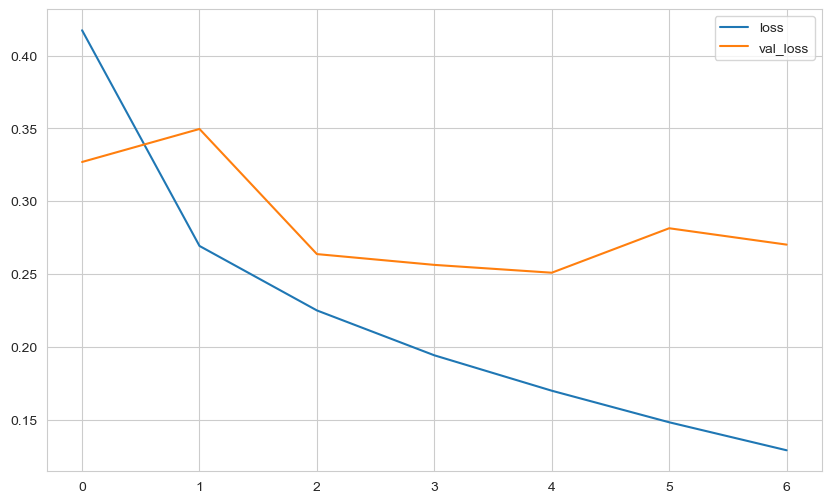

In [86]:
summary[["loss", "val_loss"]].plot()

<Axes: >

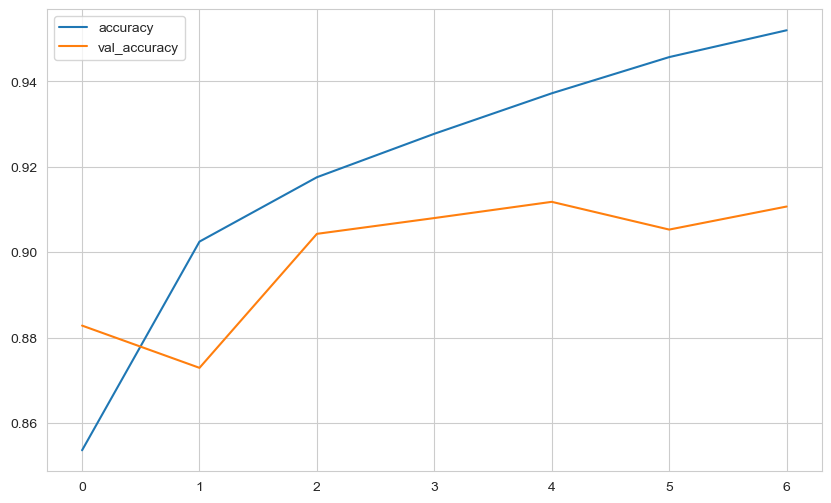

In [87]:
summary[["accuracy", "val_accuracy"]].plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [89]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2509 - accuracy: 0.9118


[0.2509446144104004, 0.9118000268936157]

In [90]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy", score[1])
#model achieved a test loss of approximately 0.261 and a test accuracy of about 91.14%
#This indicates that the model performed well

Test loss:  0.2509446144104004
Test accuracy 0.9118000268936157


In [91]:
pred_prob = model.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)


313/313 [==============================] - 2s 5ms/step


In [92]:
pred_prob.shape

(10000, 10)

In [93]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [94]:
y_test_arg=np.argmax(y_test,axis=1)

In [95]:
Y_pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 2s 5ms/step


In [96]:
print(confusion_matrix(y_test_arg, Y_pred))

[[847   0  19  10   3   2 114   0   5   0]
 [  3 974   1  15   2   0   4   0   1   0]
 [ 14   0 884   6  24   0  71   0   1   0]
 [ 16   4  16 894  30   0  39   0   1   0]
 [  1   1  88  17 819   0  74   0   0   0]
 [  0   0   0   0   0 988   0   9   0   3]
 [ 84   0  47  20  42   0 801   0   6   0]
 [  0   0   0   0   0   9   0 978   0  13]
 [  4   1   2   1   0   2   5   2 983   0]
 [  1   0   0   0   0   6   0  43   0 950]]


In [97]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.93      0.89      0.91      1000
           4       0.89      0.82      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.72      0.80      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<Axes: >

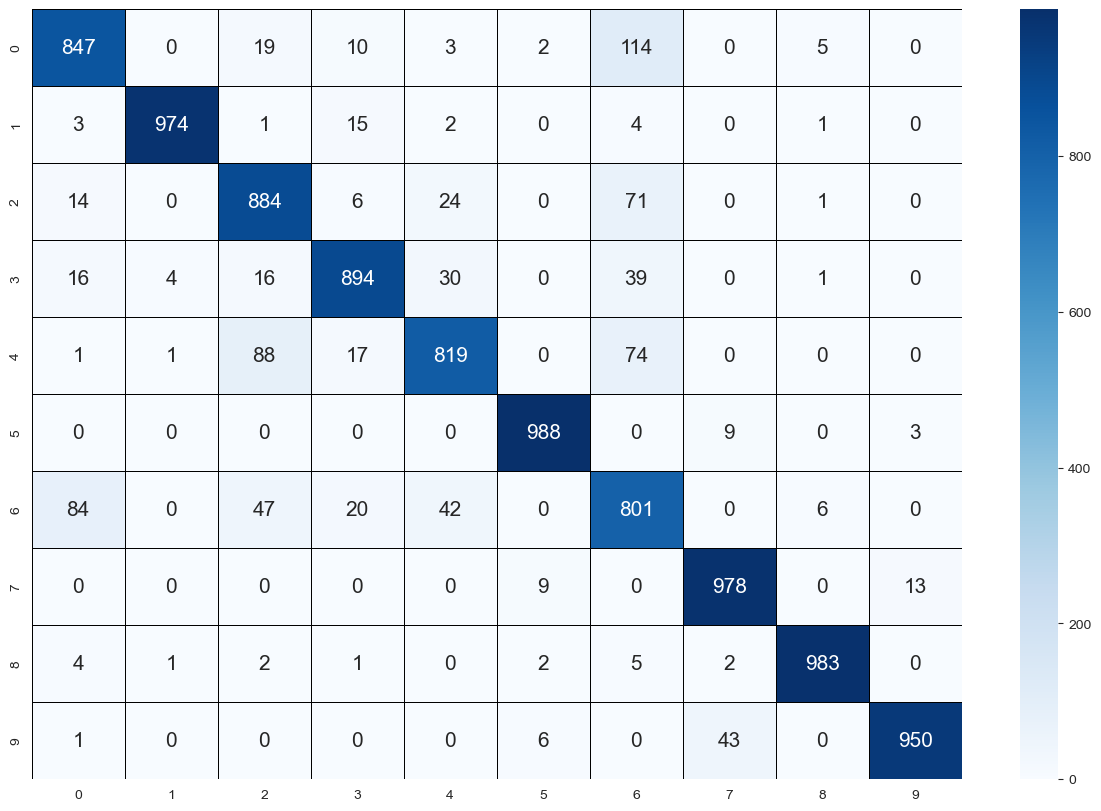

In [98]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test_arg, Y_pred), 
            annot=True, cmap="Blues", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size" : 15})

In [99]:
(y_test_arg != Y_pred).sum()
#This suggests that your model made incorrect predictions for 886 samples in the test dataset.

882

## Prediction

In [100]:
model.save("cnn-1.h5")

In [101]:
model = tf.keras.models.load_model("cnn-1.h5")

In [102]:
pred = model.predict(np.expand_dims(X_test[24], axis=0))
np.argmax(pred)

1/1 [==============================] - 0s 44ms/step


1

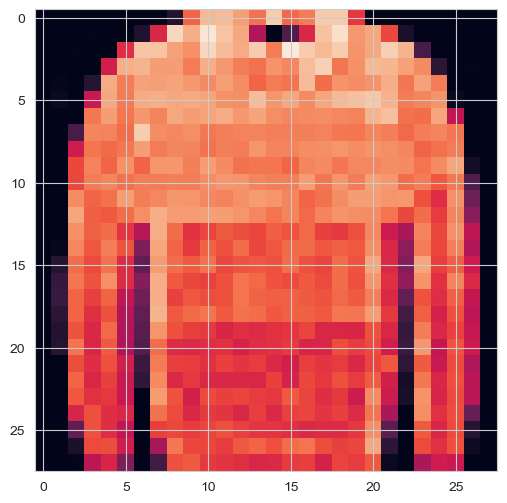

In [103]:
plt.imshow(X_test[20].reshape(28,28))

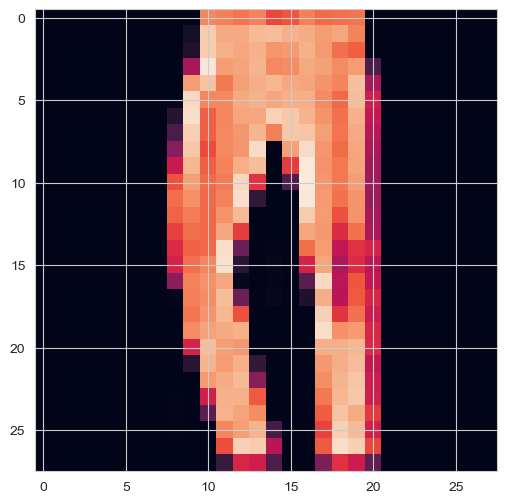

In [104]:
plt.imshow(X_test[5].reshape(28,28))

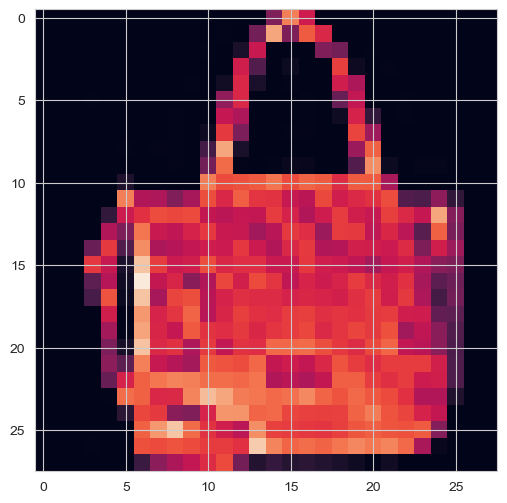

In [105]:
plt.imshow(X_test[2000].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___